<a href="https://colab.research.google.com/github/k33rth1/credit_card_fraud_detection/blob/master/facemask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install kaggle

In [46]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [47]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'
!kaggle datasets download -d omkargurav/face-mask-dataset


face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


os module, this provides a way to interact with the operating system. environment variable "named KAGGLE_CONFIG_DIR" to the directory "/root/.kaggle". The Kaggle CLI uses this environment variable to determine the location of the "kaggle.json" file, which contains your Kaggle API credentials. By setting this environment variable, you're specifying where the Kaggle CLI should look for the kaggle.json file.

In [48]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [49]:
!ls

 data			 img1.jpg     'mask under chin.jpg'   with_mask.jpg
 face-mask-dataset.zip	 kaggle.json   sample_data	      without_mask.jpg


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

OS to access the files that we have in those folders
import numpy because we will convert these images into numpy arrays I will also import matplotlib as PLT I'll also import
matplotlib.image as mpimg so these two uh you know map.lib library has this modules of Pi plot and image and we are going to use these modules in order to visualize our images and basically do some processing so that's the purpose
I'll also import CV2 to library so this CV2 library is used for image processing and and all those tasks which are
related to images and that is another function that we need to         *import which is from Google dot collab dot patches
import CV to IM show
now this is a interesting function so in
CV2 Library we have a function called as
IM show which kind of creates a new
window and displays your image in that
window and in this collab environment
it's not possible to do that so Google
collab kind of as a similar function
which is stored in this Google collab
patches and this is called a CV2
underscore I am sure so if you want to
use the one that is present in CV2
Library so you would give this a CB2 dot
I am sure but we won't use that in this
notebook environment so I hope that is
clear and the next thing that we will
import is from*   
pil which is basically pillow Library I am going to import image so pillow is also another image processing library that we have it is used to read images and do some processing on it and then

 I'll import my trained split from sklearn dot model selection import train test split so this function is used to split our data into training data test data so let's run this cell so these are the libraries that we need


In [51]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1136.jpg', 'with_mask_2936.jpg', 'with_mask_2699.jpg', 'with_mask_3600.jpg', 'with_mask_1615.jpg']
['with_mask_3109.jpg', 'with_mask_2309.jpg', 'with_mask_2159.jpg', 'with_mask_1640.jpg', 'with_mask_2869.jpg']


In [52]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2509.jpg', 'without_mask_2697.jpg', 'without_mask_2299.jpg', 'without_mask_2112.jpg', 'without_mask_2894.jpg']
['without_mask_38.jpg', 'without_mask_633.jpg', 'without_mask_2187.jpg', 'without_mask_2649.jpg', 'without_mask_1414.jpg']


In [53]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [54]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [55]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [56]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [57]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


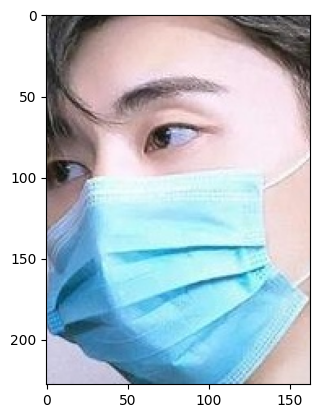

In [58]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

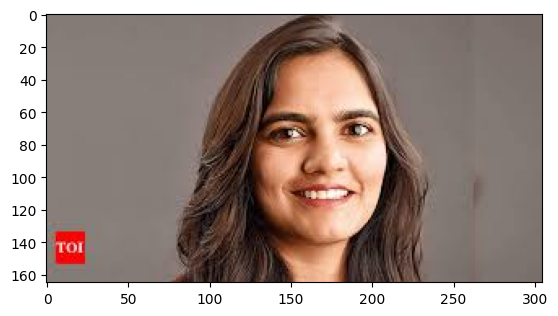

In [59]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1645.jpg')
imgplot = plt.imshow(img)
plt.show()

In [60]:
from PIL import Image
import os
import numpy as np

with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'
data = []

# Load images with masks
for img_file in os.listdir(with_mask_path):
    try:
        image = Image.open(os.path.join(with_mask_path, img_file))
        image = image.resize((128, 128))
        image = image.convert('RGBA')  # Convert to RGBA format
        image = image.convert('RGB')   # Convert back to RGB format
        image = np.array(image)
        data.append(image)
    except Exception as e:
        print(f"Error loading image {img_file}: {e}")

# Load images without masks
for img_file in os.listdir(without_mask_path):
    try:
        image = Image.open(os.path.join(without_mask_path, img_file))
        image = image.resize((128, 128))
        image = image.convert('RGBA')  # Convert to RGBA format
        image = image.convert('RGB')   # Convert back to RGB format
        image = np.array(image)
        data.append(image)
    except Exception as e:
        print(f"Error loading image {img_file}: {e}")



In [61]:
type(data)

list

In [62]:
len(data)

7553

array([[[ 39,  34,  40],
        [ 38,  33,  39],
        [ 36,  33,  38],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       [[ 43,  37,  43],
        [ 40,  35,  41],
        [ 39,  34,  40],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       [[ 41,  34,  41],
        [ 39,  33,  40],
        [ 38,  32,  39],
        ...,
        [234, 235, 229],
        [234, 235, 229],
        [234, 235, 229]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 254, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 255]]], dtype=uint8)
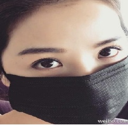

In [63]:
data[0]

In [64]:
type(data[0])

numpy.ndarray

In [65]:
data[0].shape

(128, 128, 3)

In [66]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [67]:
type(X)

numpy.ndarray

In [68]:
type(Y)

numpy.ndarray

In [69]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [70]:
print(Y)

[1 1 1 ... 0 0 0]


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [73]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [253, 254, 255],
        [255, 253, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [253, 254, 255],
        [255, 253, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
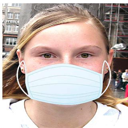

In [74]:
X_train[0]

In [75]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98039216, 1.        , 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        [1.        , 0.99215686, 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98039216, 1.        , 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        [1.        , 0.99215686, 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99215686, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [78]:

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

# Extract the predicted accuracy
accuracy = input_prediction[0][1]

print("Accuracy:", accuracy)

# Check if the accuracy is above 0.58
if accuracy > 0.58:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')
